In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import random
from datetime import datetime
from math import nan
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import statsmodels.api as sm
import scipy.stats as stats

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
sns.set_style("whitegrid")

In [4]:
player_group_date = pd.read_csv('../dataset/player_group_date.csv')

In [5]:
player_group_date.head()

,player_api_id,date,passing,shooting,defence,goalkeeping,offence_misc,movement
0,2625,2007,59.67,54.125,61.25,16.25,56.0,62.67
1,291219,2007,38.33,63.750,24.50,10.25,60.0,60.67
2,27421,2007,61.67,49.750,70.00,18.50,69.0,57.00
3,45464,2007,58.00,31.500,65.25,13.00,63.0,59.67
4,182107,2007,38.67,28.500,43.25,17.50,38.0,60.33


In [6]:
matches_h_XY = pd.read_csv('../dataset/matches_h_XY.csv')
matches_a_XY = pd.read_csv('../dataset/matches_a_XY.csv')

In [7]:
matches_r = pd.read_csv('../dataset/results.csv')

In [8]:
matches_h_XY.head()

,match_api_id,player_num,player_api_id,X,Y,Position,date
0,483130,7,39962,4.0,7.0,MF,2008
1,483130,10,31292,4.0,10.0,ST,2008
2,483130,6,39978,2.0,7.0,W,2008
3,483130,11,25537,6.0,10.0,ST,2008
4,483130,2,32571,2.0,3.0,SB,2008


In [9]:
def add_stats(df):
    df = df.drop(columns = ['player_num','X', 'Y'])
    df = df.sort_values(['date'], ascending = True)
    
    df_merge = pd.merge_asof(df, player_group_date, on='date', by='player_api_id', direction='nearest')
        
    df_merge.drop(columns = ['player_api_id', 'date'], inplace = True)
    
    df_merge_mean = df_merge.groupby(['match_api_id','Position']).mean().round(2)
    df_merge_mean = df_merge_mean.reset_index()
    
    df_merge_wide = pd.pivot(df_merge_mean, index = 'match_api_id', columns = 'Position', 
                             values = player_group_date.columns[2:])
    df_merge_wide.columns = df_merge_wide.columns.to_flat_index()
    df_merge_wide = df_merge_wide.reset_index()
    
    return df_merge_wide

In [10]:
matches_h_stats = add_stats(matches_h_XY)  

In [11]:
matches_a_stats = add_stats(matches_a_XY)  

In [12]:
matches_h_stats.head()

,match_api_id,"(passing, CB)","(passing, GK)","(passing, MF)","(passing, SB)","(passing, ST)","(passing, W)","(shooting, CB)","(shooting, GK)","(shooting, MF)","(shooting, SB)","(shooting, ST)","(shooting, W)","(defence, CB)","(defence, GK)","(defence, MF)","(defence, SB)","(defence, ST)","(defence, W)","(goalkeeping, CB)","(goalkeeping, GK)","(goalkeeping, MF)","(goalkeeping, SB)","(goalkeeping, ST)","(goalkeeping, W)","(offence_misc, CB)","(offence_misc, GK)","(offence_misc, MF)","(offence_misc, SB)","(offence_misc, ST)","(offence_misc, W)","(movement, CB)","(movement, GK)","(movement, MF)","(movement, SB)","(movement, ST)","(movement, W)"
0,483130,59.67,41.33,78.00,62.66,64.16,74.34,49.12,19.50,73.50,56.50,63.50,69.25,77.62,29.50,66.62,81.50,49.38,78.88,19.12,81.25,19.62,18.88,18.38,17.75,70.16,51.33,78.84,74.59,75.34,78.00,64.00,49.00,74.34,66.83,75.66,72.66
1,483131,53.17,38.33,63.17,43.34,57.66,64.75,34.62,22.00,46.12,35.62,67.12,64.19,64.50,30.33,45.42,59.12,48.12,55.81,17.25,72.50,17.62,14.62,14.25,14.88,59.34,23.50,63.25,41.34,65.00,70.16,53.00,35.67,66.16,44.16,64.83,64.25
2,483133,71.00,41.00,76.00,77.34,68.67,79.16,53.00,22.25,74.50,64.38,81.50,66.12,75.31,19.75,57.42,74.38,42.75,67.00,20.12,82.00,16.33,13.12,16.25,19.25,71.66,34.67,77.00,77.66,82.67,80.66,68.00,22.67,72.89,72.67,87.67,79.16
3,483134,51.66,66.67,68.16,53.16,62.00,63.66,45.69,36.75,60.88,30.75,65.62,43.62,71.50,65.75,35.38,51.88,37.38,68.50,18.50,17.00,13.88,42.50,16.88,18.25,59.66,70.00,71.17,36.67,66.50,69.17,57.84,58.00,76.50,39.16,71.83,58.84
4,483135,71.00,38.33,64.78,49.34,48.00,69.50,44.12,18.50,57.92,46.38,63.00,72.00,80.38,29.00,62.75,47.75,39.75,40.50,19.12,79.25,19.00,17.38,16.50,14.50,65.41,40.33,71.00,60.67,57.67,68.17,69.17,40.33,68.45,56.66,63.33,76.83


In [13]:
position_list = ['ST', 'W', 'MF', 'CB', 'SB', 'GK']

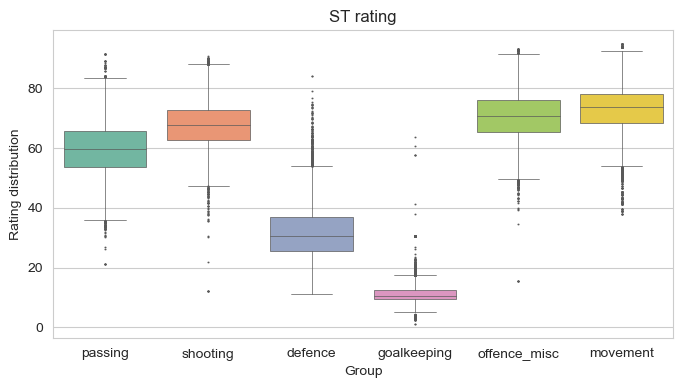

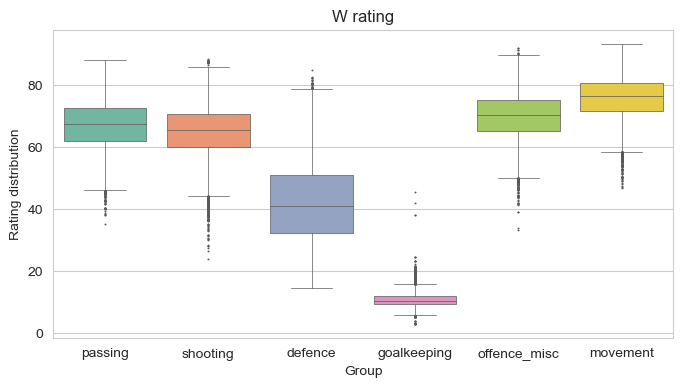

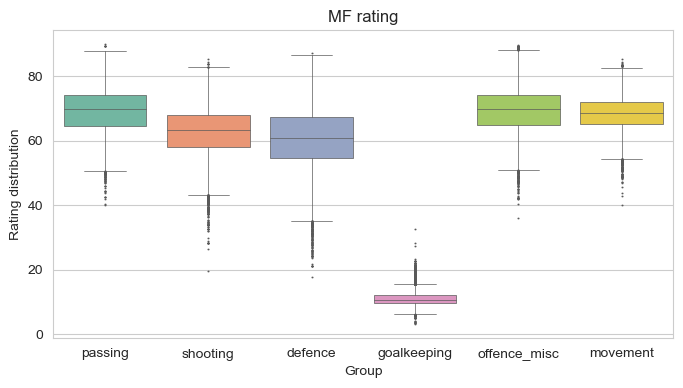

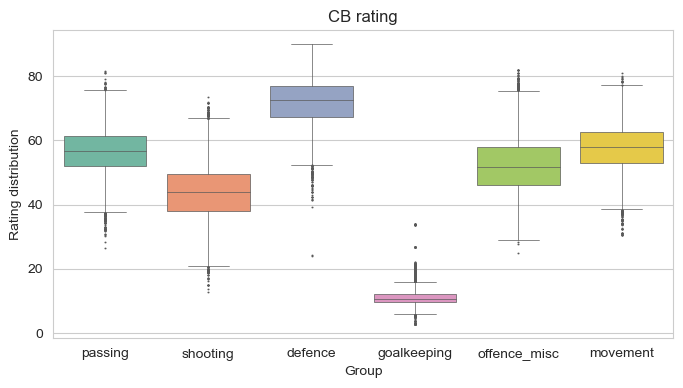

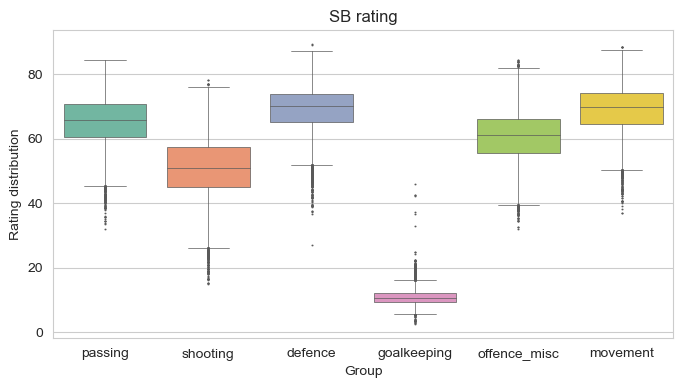

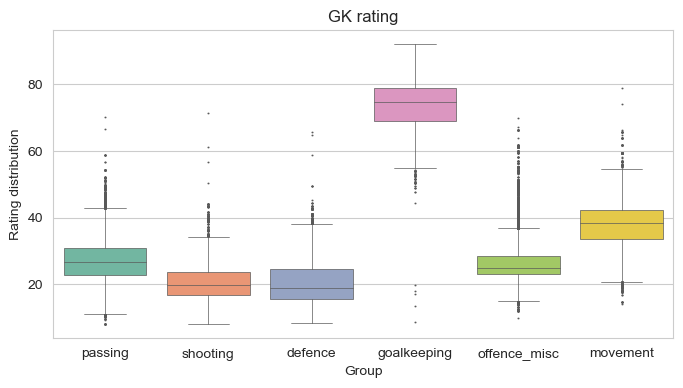

In [14]:
for position in position_list:
    position_df = matches_h_stats.filter(like=position)
    position_melt = pd.melt(position_df)
    plt.subplots(figsize=(8,4))
    sns.boxplot(x='variable', y='value', data=position_melt, palette = 'Set2', fliersize =0.5, linewidth = 0.5)
    plt.xlabel('Group')
    plt.ylabel('Rating distribution')
    plt.title(str(position)+' rating')
    plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['passing', 'shooting', 'defence', 'goalkeeping', 'offence_misc', 'movement'])    
    plt.show()

In [15]:
matches_combined = pd.merge(matches_h_stats, matches_a_stats, on = 'match_api_id')

In [16]:
column_names = matches_combined.columns
new_column_names = [name.replace("'", '').replace(', ', '_').replace('_x', '_home').replace('_y', '_away').
                    replace('(', '').replace(')', '') for name in matches_combined.columns]

matches_combined.columns = new_column_names

In [17]:
matches_combined_all = pd.merge(matches_combined, matches_r, on = 'match_api_id', how = 'left')

In [18]:
matches_combined_all.head()

,match_api_id,passing_CB_home,passing_GK_home,passing_MF_home,passing_SB_home,passing_ST_home,passing_W_home,shooting_CB_home,shooting_GK_home,shooting_MF_home,shooting_SB_home,shooting_ST_home,shooting_W_home,defence_CB_home,defence_GK_home,defence_MF_home,defence_SB_home,defence_ST_home,defence_W_home,goalkeeping_CB_home,goalkeeping_GK_home,goalkeeping_MF_home,goalkeeping_SB_home,goalkeeping_ST_home,goalkeeping_W_home,offence_misc_CB_home,offence_misc_GK_home,offence_misc_MF_home,offence_misc_SB_home,offence_misc_ST_home,offence_misc_W_home,movement_CB_home,movement_GK_home,movement_MF_home,movement_SB_home,movement_ST_home,movement_W_home,passing_CB_away,passing_GK_away,passing_MF_away,passing_SB_away,passing_ST_away,passing_W_away,shooting_CB_away,shooting_GK_away,shooting_MF_away,shooting_SB_away,shooting_ST_away,shooting_W_away,defence_CB_away,defence_GK_away,defence_MF_away,defence_SB_away,defence_ST_away,defence_W_away,goalkeeping_CB_away,goalkeeping_GK_away,goalkeeping_MF_away,goalkeeping_SB_away,goalkeeping_ST_away,goalkeeping_W_away,offence_misc_CB_away,offence_misc_GK_away,offence_misc_MF_away,offence_misc_SB_away,offence_misc_ST_away,offence_misc_W_away,movement_CB_away,movement_GK_away,movement_MF_away,movement_SB_away,movement_ST_away,movement_W_away,result
0,483130,59.67,41.33,78.00,62.66,64.16,74.34,49.12,19.50,73.50,56.50,63.50,69.25,77.62,29.50,66.62,81.50,49.38,78.88,19.12,81.25,19.62,18.88,18.38,17.75,70.16,51.33,78.84,74.59,75.34,78.00,64.00,49.00,74.34,66.83,75.66,72.66,51.67,44.67,73.00,67.34,53.16,71.00,41.88,23.50,57.88,53.38,63.62,70.25,69.41,33.75,70.75,64.50,36.71,61.75,18.12,73.50,19.00,17.25,18.25,14.50,63.84,54.33,70.84,70.34,64.75,73.34,55.00,34.67,66.83,68.84,67.84,71.16,win
1,483131,53.17,38.33,63.17,43.34,57.66,64.75,34.62,22.00,46.12,35.62,67.12,64.19,64.50,30.33,45.42,59.12,48.12,55.81,17.25,72.50,17.62,14.62,14.25,14.88,59.34,23.50,63.25,41.34,65.00,70.16,53.00,35.67,66.16,44.16,64.83,64.25,63.84,37.33,59.00,61.34,49.33,59.50,54.00,18.75,51.42,58.12,69.25,59.75,69.50,18.75,66.50,63.62,32.50,34.12,19.12,69.25,18.25,19.88,18.00,17.38,65.50,32.33,64.44,72.00,68.00,64.16,54.66,21.00,68.67,63.00,67.67,67.00,win
2,483133,71.00,41.00,76.00,77.34,68.67,79.16,53.00,22.25,74.50,64.38,81.50,66.12,75.31,19.75,57.42,74.38,42.75,67.00,20.12,82.00,16.33,13.12,16.25,19.25,71.66,34.67,77.00,77.66,82.67,80.66,68.00,22.67,72.89,72.67,87.67,79.16,68.66,38.67,66.89,60.50,54.00,59.34,55.50,20.75,61.67,42.00,34.75,67.50,72.25,31.50,60.33,70.50,63.50,33.62,17.50,75.75,17.92,18.62,15.75,18.62,69.67,39.67,72.78,63.33,65.00,64.66,63.17,34.33,68.44,60.17,57.00,70.67,win
3,483134,51.66,66.67,68.16,53.16,62.00,63.66,45.69,36.75,60.88,30.75,65.62,43.62,71.50,65.75,35.38,51.88,37.38,68.50,18.50,17.00,13.88,42.50,16.88,18.25,59.66,70.00,71.17,36.67,66.50,69.17,57.84,58.00,76.50,39.16,71.83,58.84,53.16,40.33,77.66,71.25,56.33,74.50,35.25,17.75,64.88,64.69,63.25,53.50,71.88,24.50,68.88,74.50,28.25,65.38,17.38,82.00,17.50,18.88,13.12,17.75,63.17,34.67,76.67,70.92,66.66,84.34,63.50,43.33,76.17,73.42,75.34,72.34,win
4,483135,71.00,38.33,64.78,49.34,48.00,69.50,44.12,18.50,57.92,46.38,63.00,72.00,80.38,29.00,62.75,47.75,39.75,40.50,19.12,79.25,19.00,17.38,16.50,14.50,65.41,40.33,71.00,60.67,57.67,68.17,69.17,40.33,68.45,56.66,63.33,76.83,65.00,37.00,74.78,70.50,65.67,63.84,48.12,18.50,72.17,58.62,65.25,64.75,77.50,29.25,66.92,72.62,37.75,60.38,19.50,67.25,18.50,18.12,17.50,19.50,69.66,29.33,77.11,70.34,79.33,67.16,64.83,38.00,76.56,70.00,81.33,70.50,tie


In [19]:
matches_combined_all.isna().sum()

match_api_id               0
passing_CB_home            0
passing_GK_home            0
passing_MF_home            0
passing_SB_home         1303
passing_ST_home            0
passing_W_home          1859
shooting_CB_home           0
shooting_GK_home           0
shooting_MF_home           0
shooting_SB_home        1303
shooting_ST_home           0
shooting_W_home         1859
defence_CB_home            0
defence_GK_home            0
defence_MF_home            0
defence_SB_home         1303
defence_ST_home            0
defence_W_home          1859
goalkeeping_CB_home        0
goalkeeping_GK_home        0
goalkeeping_MF_home        0
goalkeeping_SB_home     1303
goalkeeping_ST_home        0
goalkeeping_W_home      1859
offence_misc_CB_home       0
offence_misc_GK_home       0
offence_misc_MF_home       0
offence_misc_SB_home    1303
offence_misc_ST_home       0
offence_misc_W_home     1859
movement_CB_home           0
movement_GK_home           0
movement_MF_home           0
movement_SB_ho

In [20]:
matches_combined_all = matches_combined_all.dropna()

In [21]:
matches_combined_all.columns

Index(['match_api_id', 'passing_CB_home', 'passing_GK_home', 'passing_MF_home',
       'passing_SB_home', 'passing_ST_home', 'passing_W_home',
       'shooting_CB_home', 'shooting_GK_home', 'shooting_MF_home',
       'shooting_SB_home', 'shooting_ST_home', 'shooting_W_home',
       'defence_CB_home', 'defence_GK_home', 'defence_MF_home',
       'defence_SB_home', 'defence_ST_home', 'defence_W_home',
       'goalkeeping_CB_home', 'goalkeeping_GK_home', 'goalkeeping_MF_home',
       'goalkeeping_SB_home', 'goalkeeping_ST_home', 'goalkeeping_W_home',
       'offence_misc_CB_home', 'offence_misc_GK_home', 'offence_misc_MF_home',
       'offence_misc_SB_home', 'offence_misc_ST_home', 'offence_misc_W_home',
       'movement_CB_home', 'movement_GK_home', 'movement_MF_home',
       'movement_SB_home', 'movement_ST_home', 'movement_W_home',
       'passing_CB_away', 'passing_GK_away', 'passing_MF_away',
       'passing_SB_away', 'passing_ST_away', 'passing_W_away',
       'shooting_CB_away', 's

In [22]:
advantage_pair = {
    'offence_box_adv':(['shooting_ST_home','shooting_W_home'],['defence_CB_away','defence_SB_away'],1), 
    'offence_GK_adv':(['shooting_ST_home','shooting_W_home'],['goalkeeping_GK_away'],0.5),
    'defence_box_adv':(['defence_CB_home','defence_SB_home'],['shooting_ST_away','shooting_W_away'],1),
    'defence_GK_adv':(['goalkeeping_GK_home'],['shooting_ST_away','shooting_W_away'],2),   
    
    'offence_pass_adv':(['passing_W_home', 'passing_MF_home', 'passing_SB_home'],['defence_CB_away','defence_SB_away'],2/3),
    'offence_move_adv':(['movement_W_home'],['movement_SB_away'],1),
    'defence_pass_adv':(['defence_CB_home','defence_SB_home'],['passing_W_away', 'passing_MF_away', 'passing_SB_away'],1.5),
    'defence_move_adv':(['movement_SB_home'],['movement_W_away'],1),    

    'offence_misc_adv':(['offence_misc_MF_home','offence_misc_ST_home','offence_misc_W_home'],[
        'offence_misc_MF_away','offence_misc_ST_away','offence_misc_W_away'],1)}

In [23]:
matches_adv = matches_combined_all[['match_api_id', 'result']]

In [24]:
for new_col, (numerator_col, denominator_cols, multiplier) in advantage_pair.items():
    num_sum = matches_combined_all[numerator_col].sum(axis=1)
    deno_sum = matches_combined_all[denominator_cols].sum(axis=1)
    matches_adv[new_col] = num_sum / deno_sum * multiplier

In [25]:
matches_adv.isna().sum()

match_api_id        0
result              0
offence_box_adv     0
offence_GK_adv      0
defence_box_adv     0
defence_GK_adv      0
offence_pass_adv    0
offence_move_adv    0
defence_pass_adv    0
defence_move_adv    0
offence_misc_adv    0
dtype: int64

In [26]:
matches_adv_2 = matches_adv.drop(columns = ['match_api_id'])

In [27]:
X = matches_adv_2.drop(columns = ['result'])

In [28]:
y = matches_adv_2['result']

In [29]:
matches_adv_2.columns

Index(['result', 'offence_box_adv', 'offence_GK_adv', 'defence_box_adv',
       'defence_GK_adv', 'offence_pass_adv', 'offence_move_adv',
       'defence_pass_adv', 'defence_move_adv', 'offence_misc_adv'],
      dtype='object')

In [30]:
matches_adv_2.head()

,result,offence_box_adv,offence_GK_adv,defence_box_adv,defence_GK_adv,offence_pass_adv,offence_move_adv,defence_pass_adv,defence_move_adv,offence_misc_adv
0,win,0.991337,0.903061,1.188616,1.213864,1.070371,1.055491,1.129365,0.939151,1.111281
1,win,0.986403,0.948087,0.958295,1.124031,0.857672,1.019841,1.031083,0.659104,1.009207
2,win,1.034116,0.974389,1.463961,1.603912,1.085814,1.315606,1.202458,1.028301,1.187167
3,win,0.746277,0.666098,1.056788,0.291221,0.842465,0.801417,0.828387,0.541333,0.908508
4,tie,0.899281,1.003717,0.985615,1.219231,0.815437,1.097571,0.919066,0.803688,0.880322


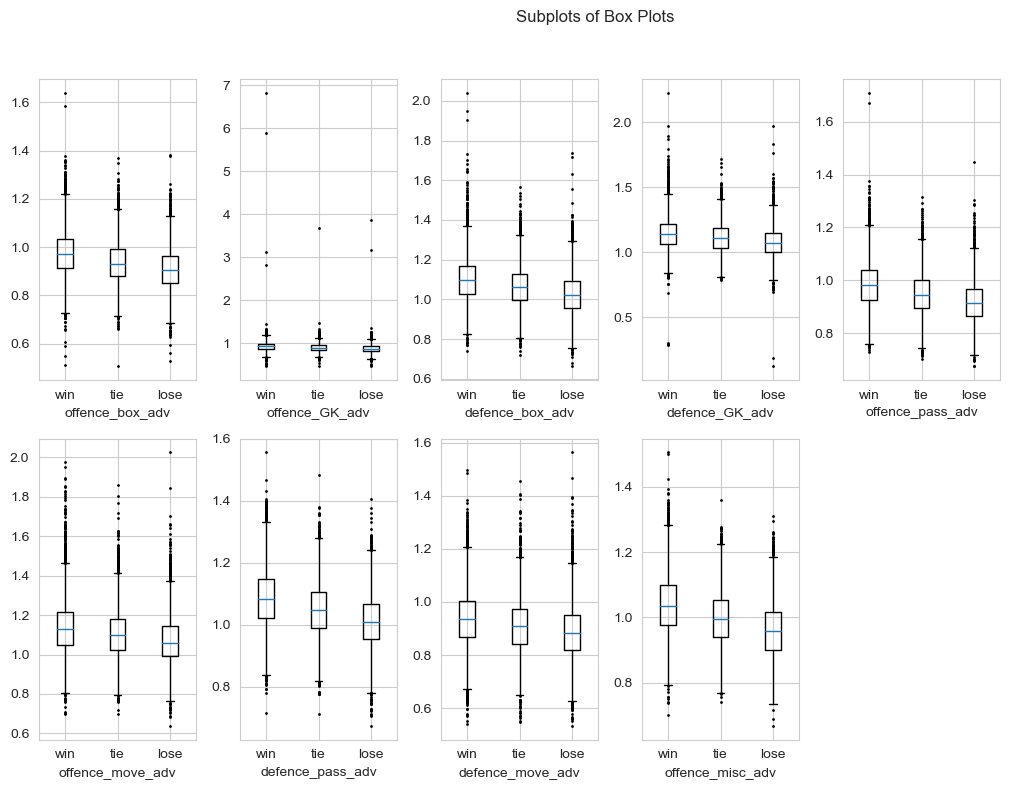

In [31]:
plt.figure(figsize=(12, 8))
plt.tight_layout()
sns.set_palette("Paired")

# Define the categories of 'result'
categories = matches_adv_2['result'].unique()

# Iterate over each column (except 'result')
for i, column in enumerate(matches_adv_2.columns[1:], start=1):
    plt.subplot(2, 5, i)
    
    # Create a list to store box plot data for each category
    boxplot_data = []
    
    # Iterate over each category and collect the data
    for category in categories:
        data = matches_adv_2[matches_adv_2['result'] == category][column]
        boxplot_data.append(data)
    
    # Plot the box plots for each category
    plt.boxplot(boxplot_data, labels=categories, flierprops={'markersize': 1}) 
    
    plt.xlabel(column)

# Set the main title for the entire plot
plt.suptitle('Subplots of Box Plots')

# Adjust the spacing between subplots
plt.tight_layout(rect=[0, 0, 0.85, 0.95])

# Display the plot
plt.show()

In [32]:
z_scores = np.abs((X - X.mean()) / X.std())
outliers = z_scores > 4
outliers_rows = matches_adv_2[outliers.any(axis=1)]

In [33]:
outliers_rows.shape

(131, 10)

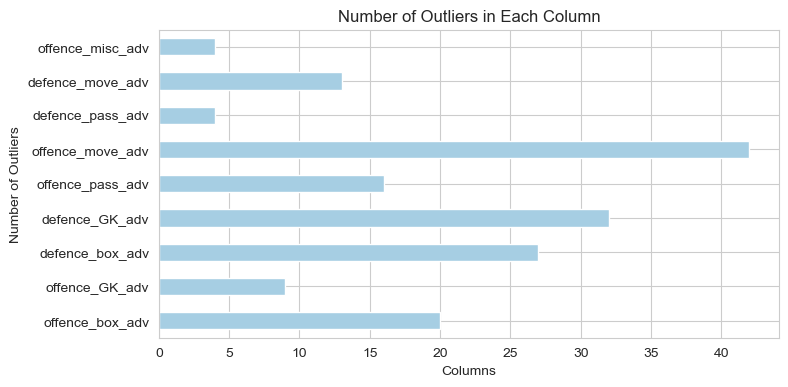

In [34]:
outlier_counts = outliers.sum()
plt.figure(figsize=(8, 4))
outlier_counts.plot(kind='barh')
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers in Each Column')
plt.show()

<Axes: >

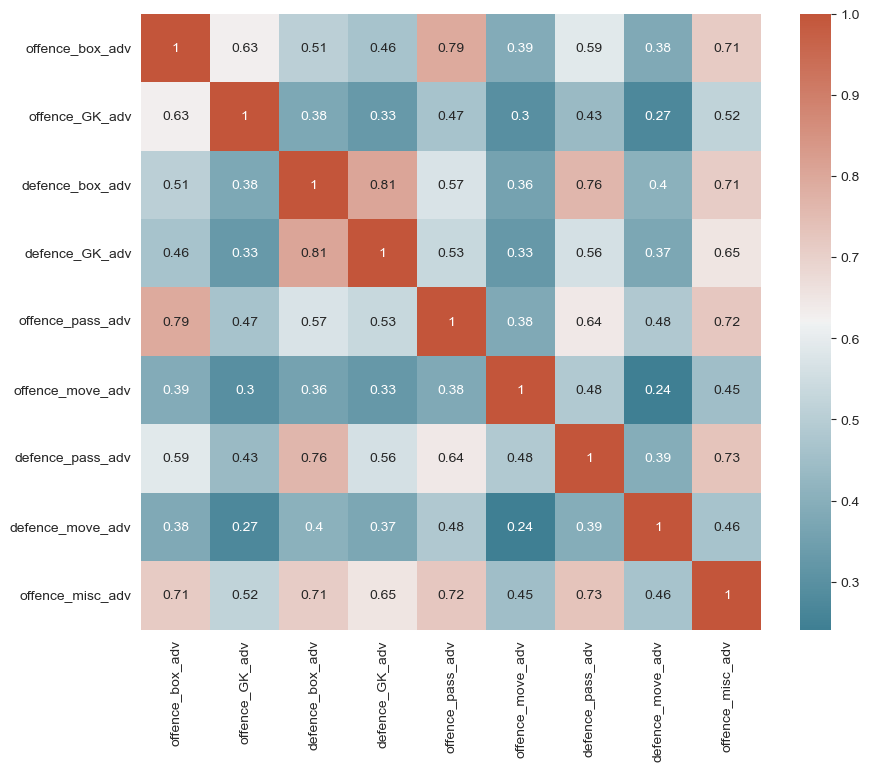

In [35]:
plt.subplots(figsize=(10,8))
sns.heatmap(X.corr(),annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [36]:
X = matches_adv_2.drop(columns = ['result'], axis = 1)

y = matches_adv_2['result']

In [37]:
X_sm = sm.add_constant(X)

label_mapping = {'lose':0, 'tie':0.5, 'win':1}

y_sm = y.map(label_mapping)

log_reg = sm.Logit(y_sm, X_sm).fit()
print(log_reg.summary2())

Optimization terminated successfully.
         Current function value: 0.604871
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.103     
Dependent Variable: result           AIC:              19760.5833
Date:               2023-08-04 19:55 BIC:              19837.5835
No. Observations:   16318            Log-Likelihood:   -9870.3   
Df Model:           9                LL-Null:          -10999.   
Df Residuals:       16308            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const            -9.0494   0.2454 -36.8789 0.0000 -9.5304 -8.5685
offence_box_adv   0.6809   0.3668   1.8563 0.0634 -0.0380  1.3999


In [38]:
Win = matches_adv_2[matches_adv_2['result'] == 'win']
Tie = matches_adv_2[matches_adv_2['result'] == 'tie']
Lose = matches_adv_2[matches_adv_2['result'] == 'lose']

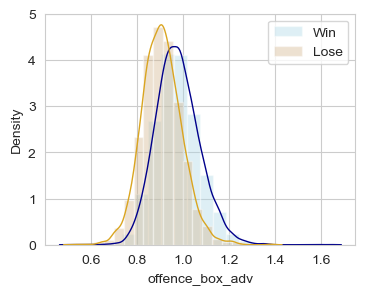

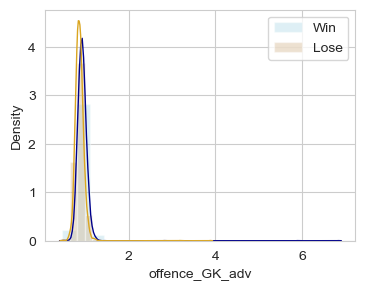

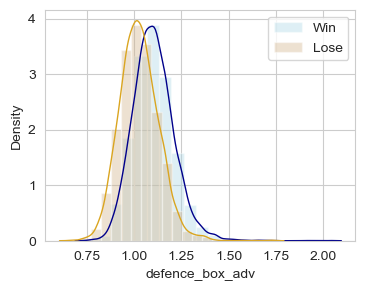

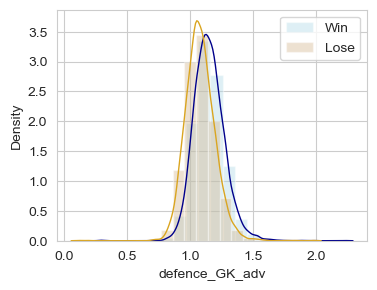

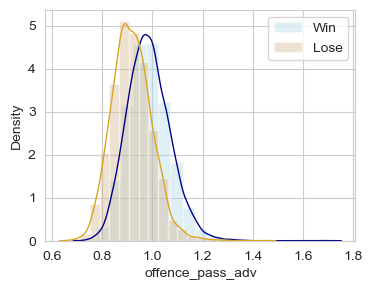

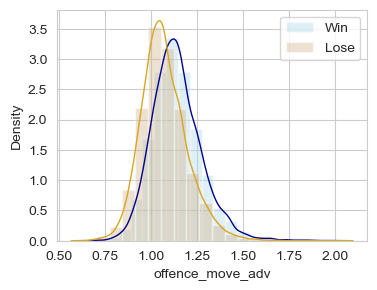

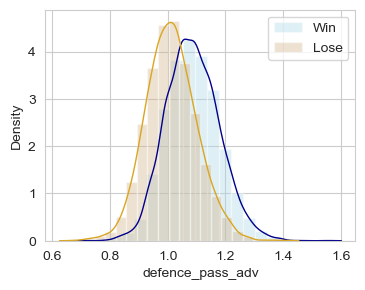

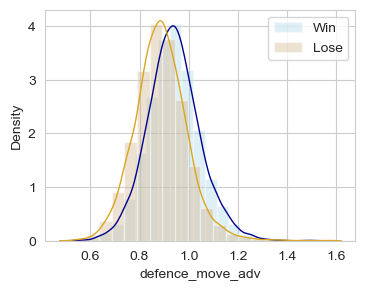

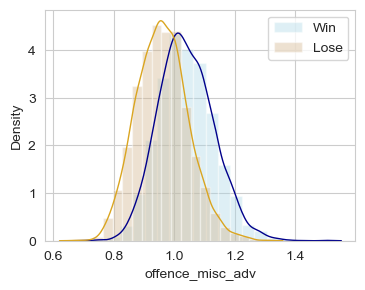

In [39]:
for col in X.columns:
    fig, ax = plt.subplots(figsize=(4,3))
    sns.distplot(Win[col], hist=True, kde=True, 
                 kde_kws={'linewidth':1, 'color': 'darkblue'}, bins=20, color='lightblue', label='Win')
    sns.distplot(Lose[col], hist=True, kde=True, 
                 kde_kws={'linewidth':1, 'color': 'goldenrod'}, bins=20, color='tan', label='Lose')
    plt.legend()
    plt.show()

In [40]:
matches_adv_2.to_csv('../dataset/model_df2.csv', index = False)